In [3]:
# !wget -r -N -c -np https://physionet.org/files/picsdb/1.0.0/ #original download options for reference
# %cp -R /content/physionet.org/files/picsdb/1.0.0/ "/content/drive/MyDrive/WOA 7015 Machine Learning/Data" #copied downloaded data to specific gdrive folder 

# alternatively, download files to drive directly. need to do only once
# !wget -P "/content/drive/MyDrive/WOA 7015 Machine Learning/Data" https://physionet.org/files/picsdb/1.0.0/

In [4]:
# import all relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

import wfdb
from wfdb import processing



In [5]:
# assign the correct path to downloaded data and filenames
# realpath is this script path, while data is subfolder in the same dir
# parent_dir =  os.path.dirname(os.path.realpath(__file__))

parent_dir = os.path.abspath('')
data_dir =  os.path.join(parent_dir,'data')


filenames = []

for i in range(10):
    filenames.append('infant'+str(i+1))

# print and list all relevant filenames, as a quick check
print(parent_dir)
print(data_dir)
print(filenames)




d:\Github\ecg_resp
d:\Github\ecg_resp\data
['infant1', 'infant2', 'infant3', 'infant4', 'infant5', 'infant6', 'infant7', 'infant8', 'infant9', 'infant10']


In [6]:
# loop through all files and save the dict

dict_ecg = []
dict_resp = []
for i in range(len(filenames)):
    path = data_dir+'/'+filenames[i]
    path_ecg = path+'_ecg'
    path_resp = path+'_resp'
    dict_ecg.append(wfdb.rdrecord(path_ecg).__dict__) 
    dict_resp.append(wfdb.rdrecord(path_resp).__dict__)



df_ecg = pd.DataFrame(dict_ecg)
df_resp = pd.DataFrame(dict_resp)

# # save to csv
# df_ecg.to_csv(data_dir+'\processed\summary_ecg.csv', index=False)
# df_resp.to_csv(data_dir+'\processed\summary_resp.csv', index=False)




In [7]:
df_ecg

record_name  n_sig   fs counter_freq base_counter    sig_len base_time  \
0   infant1_ecg      1  250         None         None   41052191      None   
1   infant2_ecg      1  500         None         None   78916000      None   
2   infant3_ecg      1  500         None         None   78684614      None   
3   infant4_ecg      1  500         None         None   84208000      None   
4   infant5_ecg      1  250         None         None   43878723      None   
5   infant6_ecg      1  500         None         None   87492197      None   
6   infant7_ecg      1  500         None         None   36604500      None   
7   infant8_ecg      1  500         None         None   44288000      None   
8   infant9_ecg      1  500         None         None  126569088      None   
9  infant10_ecg      1  500         None         None   85083254      None   

  base_date comments sig_name  ...    skew byte_offset     adc_gain baseline  \
0      None       []    [ECG]  ...  [None]      [None]   [800.6597]     [28]   
1      None       []     [II]  ...  [None]      [None]  [1220.7707]  [15160]   
2      None       []     [II]  ...  [None]      [None]  [1140.7954]  [11394]   
3      None       []     [II]  ...  [None]      [None]   [834.3036]   [-141]   
4      None       []    [ECG]  ...  [None]      [None]   [800.6597]     [28]   
5      None       []     [II]  ...  [None]      [None]   [800.6141]     [26]   
6      None       []     [II]  ...  [None]      [None]  [1283.8528]  [19820]   
7      None       []     [II]  ...  [None]      [None]  [1420.7631]  [25427]   
8      None       []     [II]  ...  [None]      [None]   [800.6597]     [28]   
9      None       []      [I]  ...  [None]      [None]   [800.4159]     [18]   

  units adc_res adc_zero init_value  checksum block_size  
0  [mV]     [0]      [0]       [12]  [-25872]        [0]  
1  [mV]     [0]      [0]    [15148]  [-14825]        [0]  
2  [mV]     [0]      [0]    [11502]   [22904]        [0]  
3  [mV]     [0]      [0]     [-141]  [-22961]        [0]  
4  [mV]     [0]      [0]       [28]   [10734]        [0]  
5  [mV]     [0]      [0]       [-6]   [16449]        [0]  
6  [mV]     [0]      [0]    [19820]   [27997]        [0]  
7  [mV]     [0]      [0]    [25164]    [-848]        [0]  
8  [mV]     [0]      [0]       [28]   [11483]        [0]  
9  [mV]     [0]      [0]       [18]   [11837]        [0]  

[10 rows x 27 columns]

In [8]:
df_resp

record_name  n_sig   fs counter_freq base_counter   sig_len base_time  \
0   infant1_resp      1  500         None         None  82122000      None   
1   infant2_resp      1   50         None         None   7891433      None   
2   infant3_resp      1   50         None         None   7868296      None   
3   infant4_resp      1   50         None         None   8420800      None   
4   infant5_resp      1   50         None         None   8955598      None   
5   infant6_resp      1   50         None         None   8749057      None   
6   infant7_resp      1   50         None         None   3660288      None   
7   infant8_resp      1   50         None         None   4428613      None   
8   infant9_resp      1   50         None         None  12656784      None   
9  infant10_resp      1   50         None         None   8508154      None   

  base_date comments sig_name  ...    skew byte_offset     adc_gain  baseline  \
0      None       []   [RESP]  ...  [None]      [None]  [1340.5223]  [-32019]   
1      None       []   [RESP]  ...  [None]      [None]  [1424.7496]  [-32740]   
2      None       []   [RESP]  ...  [None]      [None]  [1432.6657]  [-30481]   
3      None       []   [RESP]  ...  [None]      [None]  [2363.6001]  [-32767]   
4      None       []   [RESP]  ...  [None]      [None]  [1003.8455]  [-28254]   
5      None       []   [RESP]  ...  [None]      [None]   [1634.698]  [-32767]   
6      None       []   [RESP]  ...  [None]      [None]  [2568.9515]  [-32767]   
7      None       []   [RESP]  ...  [None]      [None]  [2021.2766]  [-32747]   
8      None       []   [RESP]  ...  [None]      [None]  [1073.2102]  [-28472]   
9      None       []   [RESP]  ...  [None]      [None]   [994.5159]  [-32748]   

  units adc_res adc_zero init_value  checksum block_size  
0  [NU]     [0]      [0]   [-32763]  [-26958]        [0]  
1  [NU]     [0]      [0]    [-1505]  [-18450]        [0]  
2  [NU]     [0]      [0]   [-32470]  [-24767]        [0]  
3  [NU]     [0]      [0]     [2932]   [29780]        [0]  
4  [NU]     [0]      [0]     [2302]   [15964]        [0]  
5  [NU]     [0]      [0]      [-60]   [17287]        [0]  
6  [NU]     [0]      [0]     [6412]  [-30990]        [0]  
7  [NU]     [0]      [0]    [-1153]  [-29994]        [0]  
8  [NU]     [0]      [0]     [2145]   [10012]        [0]  
9  [NU]     [0]      [0]    [26309]   [27350]        [0]  

[10 rows x 27 columns]

In [28]:
# find the minimum frequency from all signals, this will be the target frequency for all

min_frequency = min(df_resp['fs'].min(), df_ecg['fs'].min() )
print(min_frequency)

df_stat = pd.DataFrame()
df_stat['record_name'] = df_resp['record_name'].values

df_stat['step_ecg'] = df_ecg['fs']/min_frequency
df_stat['sig_len_ecg'] = df_ecg['sig_len']/df_stat['step_ecg']

df_stat['step_resp'] = df_resp['fs']/min_frequency
df_stat['sig_len_resp'] = df_resp['sig_len']/df_stat['step_resp']


df_stat.loc[:, df_stat.columns != 'record_name'] = df_stat.loc[:, df_stat.columns != 'record_name'].astype(int)
df_stat.describe()

50


C:\Users\hafiidz\AppData\Local\Temp\ipykernel_23220\4122098397.py:16: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_stat.loc[:, df_stat.columns != 'record_name'] = df_stat.loc[:, df_stat.columns != 'record_name'].astype(int)


step_ecg   sig_len_ecg  step_resp  sig_len_resp
count  10.000000  1.000000e+01   10.00000  1.000000e+01
mean    9.000000  7.917074e+06    1.90000  7.935122e+06
std     2.108185  2.469258e+06    2.84605  2.476897e+06
min     5.000000  3.660450e+06    1.00000  3.660288e+06
25%    10.000000  7.874246e+06    1.00000  7.874080e+06
50%    10.000000  8.315619e+06    1.00000  8.316500e+06
75%    10.000000  8.688996e+06    1.00000  8.688831e+06
max    10.000000  1.265691e+07   10.00000  1.265678e+07

In [29]:
# Load the WFDB record and the physical samples, by looping for each files and write samples to csv

for i in range(len(filenames)):
    path = data_dir+'\\'+filenames[i]
    
    ecg = {}
    resp = {}

    ecg['path'] = path+'_ecg'
    resp['path'] = path+'_resp'

    # check step & frequency
    ecg['step'] = int(df_ecg['fs'][i]/min_frequency)
    resp['step'] = int(df_resp['fs'][i]/min_frequency)

    # sample from and to (beginning and end)
    shifter = 0
    multiplier = 2000000

    ecg['sampfrom'] = shifter
    ecg['sampto'] = multiplier*ecg['step']

    resp['sampfrom'] = shifter
    resp['sampto'] = multiplier*resp['step']

    # read ECG
    ecg_record = wfdb.rdrecord(ecg['path'], sampfrom=ecg['sampfrom'], sampto=ecg['sampto'], channels=[0])
    print("read ecg for " + filenames[i] + ", " + ecg['path'])

    sig = ecg_record.p_signal
    fs = ecg_record.fs

    # Use the GQRS algorithm to detect QRS locations in the first channel
    qrs_inds = processing.qrs.gqrs_detect(sig=ecg_record.p_signal[:,0], fs=fs)

    # compute hr
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=qrs_inds, fs=fs)

    # transform to correct file
    ecg_sig = np.transpose(sig)[0]

    # filter to the right frequency subsampling
    # [start:stop:step]

    ecg_sig = ecg_sig[::ecg['step']].copy()
    hrs = hrs[::ecg['step']].copy()

    
    df = pd.DataFrame({'hrs':hrs, 'sig':ecg_sig})

    # read respiratory data
    resp_record = wfdb.rdrecord(resp['path'], sampfrom=resp['sampfrom'], sampto=resp['sampto'], channels=[0])
    print("read resp for " + filenames[i]+ ", " + resp['path'])

    resp_sig = resp_record.p_signal


    # filter to the right frequency subsampling
    # [start:stop:step]

    resp_sig = resp_sig[::resp['step']].copy()

    # add to df
    df['resp'] = resp_sig

    # write to files
    df.to_csv(data_dir+'\processed\subsampled{postfix}.csv'.format(postfix='_'+filenames[i]), index=False)


read ecg for infant1, d:\Github\ecg_resp\data\infant1_ecg
read resp for infant1, d:\Github\ecg_resp\data\infant1_resp
read ecg for infant2, d:\Github\ecg_resp\data\infant2_ecg
read resp for infant2, d:\Github\ecg_resp\data\infant2_resp
read ecg for infant3, d:\Github\ecg_resp\data\infant3_ecg
read resp for infant3, d:\Github\ecg_resp\data\infant3_resp
read ecg for infant4, d:\Github\ecg_resp\data\infant4_ecg
read resp for infant4, d:\Github\ecg_resp\data\infant4_resp
read ecg for infant5, d:\Github\ecg_resp\data\infant5_ecg
read resp for infant5, d:\Github\ecg_resp\data\infant5_resp
read ecg for infant6, d:\Github\ecg_resp\data\infant6_ecg
read resp for infant6, d:\Github\ecg_resp\data\infant6_resp
read ecg for infant7, d:\Github\ecg_resp\data\infant7_ecg
read resp for infant7, d:\Github\ecg_resp\data\infant7_resp
read ecg for infant8, d:\Github\ecg_resp\data\infant8_ecg
read resp for infant8, d:\Github\ecg_resp\data\infant8_resp
read ecg for infant9, d:\Github\ecg_resp\data\infant9_ec

In [176]:
df = pd.read_csv(data_dir+'\processed\subsampled{postfix}.csv'.format(postfix='_'+filenames[3]))
df.describe()

hrs            sig           resp
count  98570.000000  100000.000000  100000.000000
mean     160.955875      -0.024781      15.125458
std        6.116516       0.400550       1.632994
min      142.857150      -3.416023       0.000000
25%      156.250000      -0.080306      14.777457
50%      160.427810      -0.016780      15.163310
75%      164.835160       0.035958      15.636740
max      188.679240       2.526658      21.538330

In [177]:
df = pd.read_csv(data_dir+'\processed\subsampled{postfix}.csv'.format(postfix='_'+filenames[3]))
df = df[1300:1700]
# df = df[2000:4000]
df.describe()

hrs         sig        resp
count  270.000000  400.000000  400.000000
mean   163.099227   -0.028563   11.949142
std      4.286112    0.346782    6.925773
min    153.061220   -2.192248    0.000000
25%    161.290330   -0.079108   10.616009
50%    163.934430    0.000000   15.712260
75%    164.609978    0.021875   16.139151
max    174.418610    2.032833   17.064646

<AxesSubplot:ylabel='sig'>

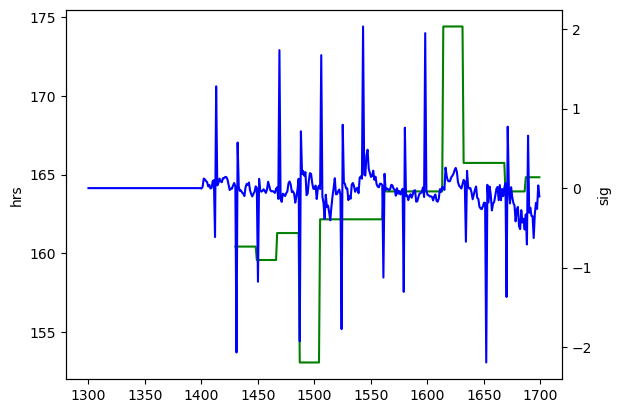

In [178]:
# read from summary files

sns.lineplot(data=df['hrs'], color="g")
# sns.lineplot(data=df['resp'], color="r")
ax2 = plt.twinx()
sns.lineplot(data=df['sig'], color="b", ax=ax2)
# sns.lineplot(data=df['resp'], color="r", ax=ax2)
